In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

In [276]:
data = pd.read_csv("data/datahw2.csv").drop("Id",axis=1)

In [277]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## preprocessing

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

решил убрать признаки у которых слишком мало не nan

In [279]:
cat = ["MiscFeature", "Fence", "PoolQC","FireplaceQu","MasVnrType","MasVnrType","Alley"]
data = data.drop(cat,axis=1)
data = data.dropna()
print(data.shape)

(1094, 74)


In [280]:
target = data["SalePrice"]
data = data.drop("SalePrice",axis=1)

Чтобы графики были адекватными

In [281]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

target = ss.fit_transform(target.values.reshape(-1,1))
target = target.ravel()

In [282]:
from sklearn.preprocessing import LabelEncoder

class autoLabelEncoder:
    def __init__(self) -> None:
        self.cat_encoders:dict = {}

    def fit(self, data:pd.DataFrame, categories:list[str]) -> None:
        for feat in categories:
            enc = LabelEncoder()
            self.cat_encoders[feat] = enc.fit(data.loc[data[feat].notna(), feat])

    def transform(self, data:pd.DataFrame, categories:list[str]) -> pd.DataFrame:
        for feat in categories:
            if(feat in data.columns):
                enc = self.cat_encoders[feat]
                data.loc[data[feat].notna(), feat] = (enc.transform(data.loc[data[feat].notna(), feat]))
                data[feat] = data[feat].astype(int)
        return data
    
    def get_encoder(self, category) -> LabelEncoder:
        return self.cat_encoders[category]


In [283]:
cat = data.select_dtypes(include='object')
le = autoLabelEncoder()
le.fit(data,cat)
data = le.transform(data, cat)

In [284]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

## task 1

### a

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

for depth in range(1,15):
    rr = RandomForestRegressor(n_estimators=1, max_depth=depth, random_state=2, bootstrap=False)
    print(-np.mean(cross_validate(rr,X_train,y_train,cv=5,scoring="neg_mean_squared_error")["test_score"]), f"depth {depth}")

0.5275140331615946 depth 1
0.38491555156227814 depth 2
0.2900847391741033 depth 3
0.2610183212763317 depth 4
0.2762645226065083 depth 5
0.270503341897025 depth 6
0.2646332000731313 depth 7
0.2378651755304034 depth 8
0.27217985669708333 depth 9
0.2392010469487719 depth 10
0.2864703318932228 depth 11
0.25338212070842203 depth 12
0.24041986849868321 depth 13
0.2473718917535784 depth 14


8 наилуч (варируется)

### b

In [287]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def decomposition_cv(model, X, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    bias = []
    variance = []
    mse = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        m_pred = np.mean(pred)
        bias.append(np.mean((m_pred-y_test)**2))
        variance.append(np.var(pred))
        mse.append(mean_squared_error(pred, y_test))
    
    return np.mean(mse), np.mean(bias), np.mean(variance)

In [288]:
rr = RandomForestRegressor(n_estimators=1, max_depth=8, bootstrap=False)
rr.fit(X_train,y_train)
pred = rr.predict(X_train)
mse, bias, var = decomposition_cv(rr, X_train, y_train, 5)
std = np.sqrt(var)

<Axes: >

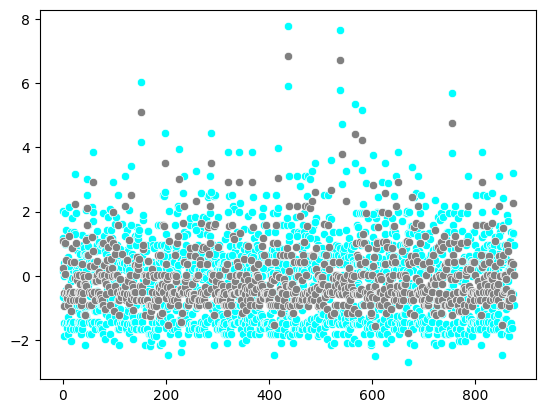

In [289]:
sns.scatterplot(x=np.arange(0,len(pred),1),y = pred+std, color='cyan')
sns.scatterplot(x=np.arange(0,len(pred),1),y = pred-std,  color='cyan')
sns.scatterplot(x=np.arange(0,len(pred),1),y = pred, color="gray")

### c

In [290]:
showing = []
for i in range(1,20,1):
    rr = RandomForestRegressor(n_estimators=i, max_depth=8, bootstrap=False)
    rr.fit(X_train,y_train)
    mse, bias, var = decomposition_cv(rr, X_train, y_train, 5)
    std = np.sqrt(var)
    showing.append((mse, std))

<Axes: >

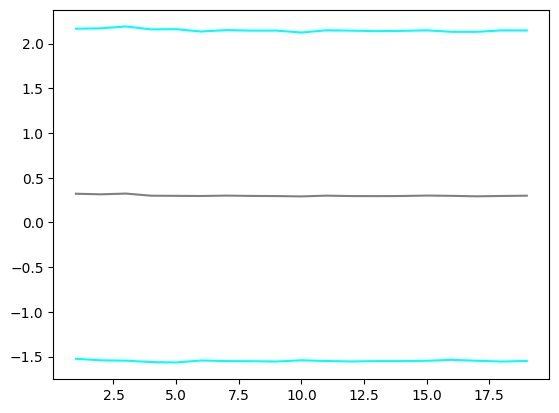

In [291]:
sns.lineplot(x=np.arange(1,20,1),y = [i for i,o in showing], color='gray')
sns.lineplot(x=np.arange(1,20,1),y = [i+2*std for i,std in showing], color='cyan')
sns.lineplot(x=np.arange(1,20,1),y = [i-2*std for i,std in showing], color='cyan')

### d

In [292]:
rr = RandomForestRegressor(n_estimators=1, max_depth=9, bootstrap=False)
rr.fit(X_train,y_train)
pred = rr.predict(X_test)

Интервалы ошибок можно построить в данном случае т.к у нас есть тестовые таргеты. Либо можно использовать std на трейне.

<Axes: >

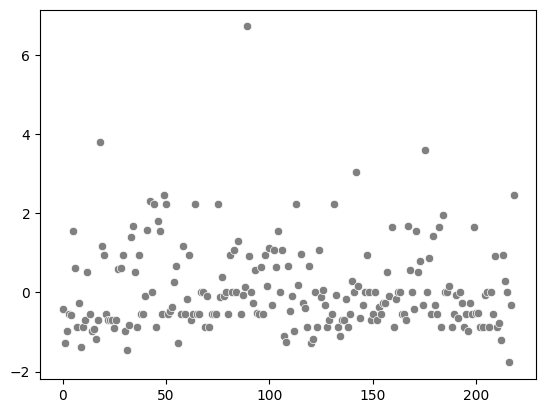

In [293]:
sns.scatterplot(x=np.arange(0,len(pred),1), y = pred, color='gray')

## task 2

In [294]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

### a

In [295]:
from sklearn.metrics import r2_score

def decomposition_cv_r2(model, X, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    bias = []
    variance = []
    r2 = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        m_pred = np.mean(pred)
        bias.append(np.mean((m_pred-y_test)**2))
        variance.append(np.var(pred))
        r2.append(r2_score(pred, y_test))
    
    return np.mean(r2), np.mean(bias), np.mean(variance)

In [296]:
par = {"max_depth":[1,3,6,8,10], "min_samples_leaf":[1,2,3,4,5]}

out_err = []
out_var = []
tree = DecisionTreeRegressor()
rcv = RandomizedSearchCV(tree, param_distributions=par, n_iter=25)
rcv.fit(X_train,y_train)
tree = DecisionTreeRegressor(**rcv.best_params_)
for i in range(20):
    tree.fit(X_train,y_train)
    r2, bias, var = decomposition_cv_r2(tree, X_train, y_train, 5)
    out_err.append(r2)
    out_var.append(var)

0.6313620566017075  сред r2 набора моделей содержащих одно дерево
0.8609338849922313  сред дисперсия


<Axes: >

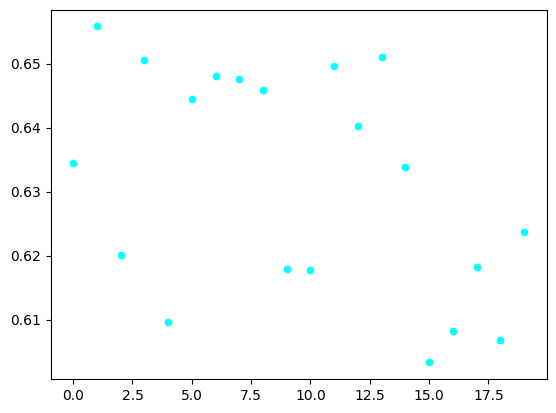

In [297]:
print(np.mean(out_err) , f" сред r2 набора моделей содержащих одно дерево")
print(np.mean(out_var), f" сред дисперсия")
sns.scatterplot(x=np.arange(0,len(out_err),1),y = out_err, color='cyan')

Видим разброс средних ошибок на кроссвалидации для набора одиночных деревьев. (Каждая точка среднее значение r2 на cv для одного дерева).\
По большей степни график показыает как значение r2 варируется от random_state, если фиксируем то идельная линия (все деревья одинаковые).

### b

In [298]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()

for depth in range(5,15):
    tree = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    br = BaggingRegressor(tree, n_estimators=20, max_samples=1., max_features=1., random_state=8)
    br.fit(X_train,y_train)
    r2, bias, var = decomposition_cv_r2(br, X_train, y_train, 5)
    print(f"depth {depth}")
    print(r2, "r2")
    print(var, "var")

depth 5
0.7001197414931333 r2
0.7007950002204653 var
depth 6
0.72543147112784 r2
0.7236613584054389 var
depth 7
0.7463614755704185 r2
0.7325746423788956 var
depth 8
0.7447951997469017 r2
0.7436083549523819 var
depth 9
0.7468415164941771 r2
0.7375448827468543 var
depth 10
0.7466735319718512 r2
0.7442738470634123 var
depth 11
0.7497505009236632 r2
0.749224572710217 var
depth 12
0.7544107738749068 r2
0.7476562986132587 var
depth 13
0.7468507215361516 r2
0.7453033421487879 var
depth 14
0.7487238837747535 r2
0.7443807536187222 var


Дисперсия уменшились (сильно зависит от рандом состояния), r2 увеличивается в следствие беггинга. При увеличении глубины точность увеличивается затем имеем переобучение.

### d

In [299]:
from mlxtend.evaluate import bias_variance_decomp

meta = []
tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2)
for i in range(10,200,20):
    model = BaggingRegressor(tree, n_estimators=i, max_samples=0.5, max_features=0.8, random_state=1)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    mse, bias, var = bias_variance_decomp(model, X_train_sub.values, y_train_sub, X_test_sub.values, y_test_sub, loss='mse', num_rounds=10, random_seed=11
    )
    meta.append((i, bias, var))

Довольно долгое обучение до 500 не получилось. 

In [300]:
def draw_bv(meta):
    sns.lineplot(x=[i[0] for i in meta], y=[i[1] for i in meta],label="bias")
    sns.lineplot(x=[i[0] for i in meta], y=[i[2] for i in meta],label="var")
    plt.plot()

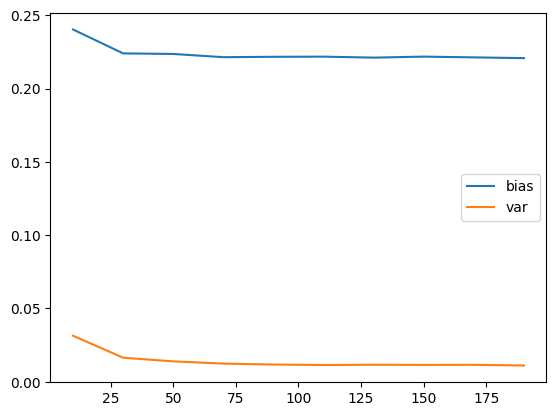

In [301]:
draw_bv(meta)

## task 3

### Шаги из 2

In [302]:
from sklearn.ensemble import RandomForestRegressor

par = {"max_depth":[1,3,6,8,10], "min_samples_leaf":[1,2,3,4,5]}

out_err = []
out_var = []
rf = RandomForestRegressor(n_estimators=1)
rcv = RandomizedSearchCV(rf, param_distributions=par, n_iter=25)
rcv.fit(X_train,y_train)
for i in range(20):
    tree = RandomForestRegressor(n_estimators=1,**rcv.best_params_)
    tree.fit(X_train,y_train)
    r2, bias, var = decomposition_cv_r2(tree, X_train, y_train, 5)
    out_err.append(r2)
    out_var.append(var)

0.606829788355362  сред r2 набора моделей содержащих одно дерево
0.8617286712389347  сред дисперсия


<Axes: >

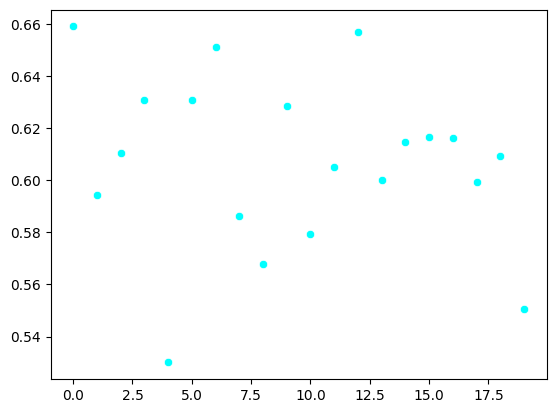

In [303]:
print(np.mean(out_err) , f" сред r2 набора моделей содержащих одно дерево")
print(np.mean(out_var), f" сред дисперсия")
sns.scatterplot(x=np.arange(0,len(out_err),1),y = out_err, color='cyan')

Видим ошибку которая в дальнейшем (когда используем ансамбли) окажется значительной.

In [304]:
for depth in range(5,15):
    tree = RandomForestRegressor(n_estimators=20,max_depth=depth, min_samples_leaf=2,random_state=2332)
    tree.fit(X_train,y_train)
    r2, bias, var = decomposition_cv_r2(tree, X_train, y_train, 5)
    print(f"depth {depth}")
    print(r2, "r2")
    print(var, "var")

depth 5
0.7277195457756012 r2
0.7087334047009772 var
depth 6
0.7486878266830221 r2
0.7233167605193369 var
depth 7
0.753124825786269 r2
0.7318751942906696 var
depth 8
0.7582259311396807 r2
0.733926517673021 var
depth 9
0.7670039118054894 r2
0.7425710588381937 var
depth 10
0.7618251418086348 r2
0.7439364264102675 var
depth 11
0.7661008663929909 r2
0.7451695874522082 var
depth 12
0.7679076273146566 r2
0.7465885138480662 var
depth 13
0.7650092279015185 r2
0.7432137626095534 var
depth 14
0.7632317391276354 r2
0.7420930863304263 var


Ожидаемо точность выше, дисперсия ниже.

In [305]:
meta = []
for i in range(10,200,20):
    model = RandomForestRegressor(n_estimators=i,max_depth=9,min_samples_leaf=2)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    mse, bias, var = bias_variance_decomp(model, X_train_sub.values, y_train_sub, X_test_sub.values, y_test_sub, loss='mse', num_rounds=10, random_seed=11
    )
    meta.append((i, bias, var))

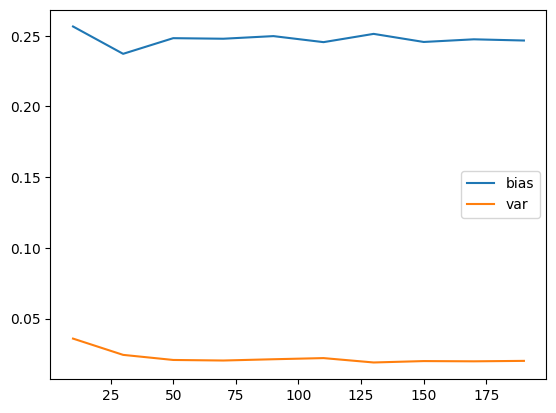

In [306]:
draw_bv(meta)

### a

In [307]:
impot = []
tree = RandomForestRegressor(n_estimators=20, max_depth=6, min_samples_leaf=2, random_state=1)
tree.fit(X_train,y_train)
for num,feat in zip(tree.feature_importances_, X_train.columns):
    impot.append((num,feat))

impot = sorted(impot,reverse=True)
print(impot)
print(mean_squared_error(tree.predict(X_test), y_test), 'all features')

[(0.6408818393971605, 'OverallQual'), (0.08479899901434178, 'GrLivArea'), (0.04183636822228897, '2ndFlrSF'), (0.0286435571980467, '1stFlrSF'), (0.025971989108144983, 'TotalBsmtSF'), (0.014374995477118922, 'LotArea'), (0.012850090440161605, 'FullBath'), (0.012608477635847704, 'BsmtFinSF1'), (0.010081928264411372, 'YearBuilt'), (0.00926917852639231, 'TotRmsAbvGrd'), (0.009134710158556816, 'GarageYrBlt'), (0.00884268820933176, 'ExterQual'), (0.008247327252977497, 'GarageCars'), (0.007361718508145214, 'GarageArea'), (0.006993735952488124, 'LotFrontage'), (0.006720750547555835, 'GarageType'), (0.006652029028653077, 'MoSold'), (0.0061612598130936745, 'Neighborhood'), (0.005621344925248817, 'OpenPorchSF'), (0.005262893907006251, 'YearRemodAdd'), (0.005143041605943235, 'KitchenQual'), (0.004847550641582469, 'OverallCond'), (0.0044725289810409056, 'BsmtQual'), (0.0040536733990292955, 'GarageFinish'), (0.004002462133811522, 'BsmtUnfSF'), (0.0030798620168074153, 'WoodDeckSF'), (0.0025029670711285

In [308]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1299,20,3,75.0,7500,1,3,3,0,4,0,...,0,0,0,0,0,0,5,2010,8,4
575,50,3,80.0,8480,1,3,3,0,4,0,...,0,102,0,0,0,0,10,2008,0,0
1376,30,3,52.0,6292,1,3,0,0,4,0,...,141,0,0,0,0,0,4,2008,8,4
892,20,3,70.0,8414,1,3,3,0,4,0,...,0,0,0,0,0,0,2,2006,8,4
1068,160,4,42.0,3964,1,3,3,0,4,0,...,20,0,0,0,0,0,6,2006,8,4


### b

In [309]:
for o in range(6):
    cat = []
    for i in range(3+o):
        cat.append(impot[i][1])
    tree.fit(X_train[cat],y_train)
    print(cat)
    print(mean_squared_error(tree.predict(X_test[cat]),y_test), f'on {3+o} features')

['OverallQual', 'GrLivArea', '2ndFlrSF']
0.1596386865729338 on 3 features
['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF']
0.16365881662678505 on 4 features
['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF']
0.15799967133755563 on 5 features
['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'LotArea']
0.15699545775119625 on 6 features
['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'LotArea', 'FullBath']
0.15131788494440018 on 7 features
['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'LotArea', 'FullBath', 'BsmtFinSF1']
0.13001311558388653 on 8 features


Результат лучше чем для всех, видимо очень сильно влияет какие признаки попадут в дерево т.к глубина не сильно большая

### c

*Для сравнения oob и cv попробуем определить оптимальную глубину дерева используя эти оценки

In [310]:
print("cv mse".ljust(38),"| oob".ljust(38), "| depth")
for i in range(5,25):
    model = RandomForestRegressor(n_estimators=50,max_depth=i,min_samples_leaf=2,oob_score=True, random_state=1)
    model.fit(X_train,y_train)
    print(f"{-np.mean(cross_validate(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")["test_score"])}".ljust(38), f"| {model.oob_score_}".ljust(38), f"| {i}")

cv mse                                 | oob                                  | depth
0.19026686733403864                    | 0.7871680735906081                   | 5
0.1822062436214868                     | 0.7974067558933028                   | 6
0.1740829945480808                     | 0.805673032165235                    | 7
0.17239988053065317                    | 0.8080785348899487                   | 8
0.16949823200903913                    | 0.8128906382011718                   | 9
0.16664352828634246                    | 0.8150471358620756                   | 10
0.167402571956672                      | 0.8115106268771358                   | 11
0.1700729617586964                     | 0.8114241613186395                   | 12
0.16502382647726166                    | 0.8158498170975369                   | 13
0.17214135855418358                    | 0.8092557633951448                   | 14
0.1648697040537474                     | 0.8149157785539392                   | 15
0.1663

Мы видим что однозначного пересечения нет (oob подрузамевает r2 метрику которую мы максимизируем).Но видим, что значения глубины не сильно отличаются. Механизмы довольно похожи, единственное oob получается почти бесплатно в сравнении с перекрестным вычислением cv.
В реальности стоит оценить обе этих метрики, чтобы обоснованнее оценить генерализацию модели.

Посмотрим что у нас на тесте

In [311]:
model = RandomForestRegressor(n_estimators=50,max_depth=15,min_samples_leaf=2,oob_score=True, random_state=1)
model.fit(X_test, y_test)
print(mean_squared_error(model.predict(X_test), y_test), "best depth by cv mse")

model = RandomForestRegressor(n_estimators=50,max_depth=16,min_samples_leaf=2,oob_score=True, random_state=1)
model.fit(X_test, y_test)
print(mean_squared_error(model.predict(X_test), y_test), "best depth by oob r2")

0.049689437067394114 best depth by cv mse
0.049689437067394114 best depth by oob r2


хороший результат в обоих случаях\
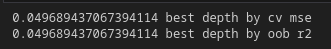\
получились одинаковые результаты (возможно влияние регуляризации через min_samples)

## task 4

По умолчанию mse? Сравним с mae

In [312]:
model1 = RandomForestRegressor(n_estimators=50, max_depth=6, min_samples_leaf=2, criterion="absolute_error")
model2 = RandomForestRegressor(n_estimators=50, max_depth=6, min_samples_leaf=2, criterion="squared_error")

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, n_estimators=50)

In [313]:
pred1 = model1.predict(X_train)
pred2 = model2.predict(X_train)

<Axes: >

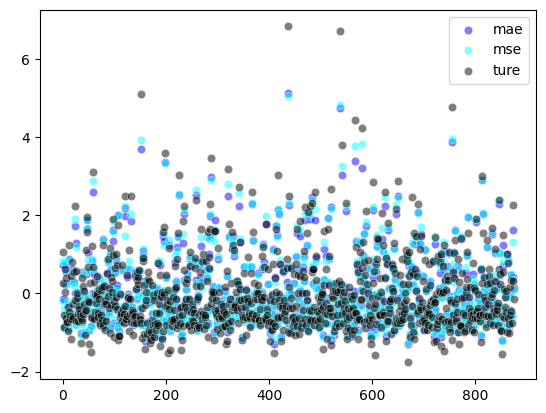

In [314]:
sns.scatterplot(x=np.arange(0,len(pred1),1),y = pred1, color='blue', label="mae", alpha=0.5)
sns.scatterplot(x=np.arange(0,len(pred1),1),y = pred2,  color='cyan', label="mse", alpha = 0.5)
sns.scatterplot(x=np.arange(0,len(pred1),1),y = y_train, color="black", label="ture", alpha = 0.5)

<Axes: >

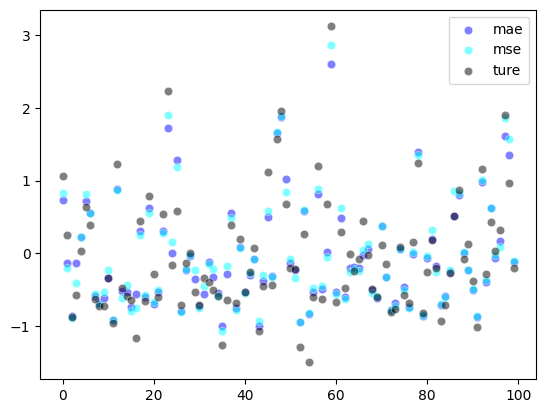

In [315]:
pred1 = pred1[:100]
pred2 = pred2[:100]
y = y_train[:100]

sns.scatterplot(x=np.arange(0,len(pred1),1),y = pred1, color='blue', label="mae", alpha=0.5)
sns.scatterplot(x=np.arange(0,len(pred1),1),y = pred2,  color='cyan', label="mse", alpha = 0.5)
sns.scatterplot(x=np.arange(0,len(pred1),1),y = y, color="black", label="ture", alpha = 0.5)

Видим что mse мение чуствительна к выбросам, как и предполагалось.

## task 5

### шаги из 2 (3ий пункт предполагает их?)

In [316]:
from sklearn.ensemble import AdaBoostRegressor

par = {"max_depth":[1,3,6,8,10], "min_samples_leaf":[1,2,3,4,5]}

out_err = []
out_var = []
rf = RandomForestRegressor(n_estimators=1)
rcv = RandomizedSearchCV(rf, param_distributions=par, n_iter=25)
rcv.fit(X_train,y_train)
tree = RandomForestRegressor(n_estimators=1,**rcv.best_params_, bootstrap=False)
for i in range(20):
    ada = AdaBoostRegressor(tree, n_estimators=1, learning_rate=0.7)
    ada.fit(X_train,y_train)
    r2, bias, var = decomposition_cv_r2(ada, X_train, y_train, 5)
    out_err.append(r2)
    out_var.append(var)

0.601384889851151  сред r2 для набора из 1 estimatior RFregressor
0.863226629665957  сред дисперсия


<Axes: >

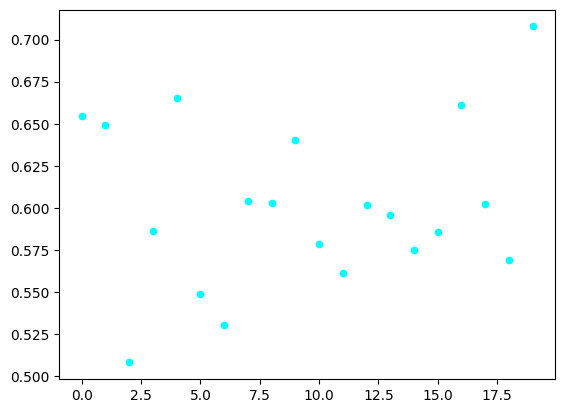

In [317]:
print(np.mean(out_err) , f" сред r2 для набора из 1 estimatior RFregressor")
print(np.mean(out_var), f" сред дисперсия")
sns.scatterplot(x=np.arange(0,len(out_err),1),y = out_err, color='cyan')

Точность от глубины:

In [318]:
for depth in range(5,10):
    tree = RandomForestRegressor(n_estimators=10,max_depth=depth, min_samples_leaf=2,random_state=2332)
    ada = AdaBoostRegressor(tree, n_estimators=10, learning_rate=0.7,random_state=1)
    r2, bias, var = decomposition_cv_r2(ada, X_train, y_train, 5)
    print(f"depth {depth}")
    print(r2, "r2")
    print(var, "var")

depth 5
0.7303721994404422 r2
0.6966949883161918 var
depth 6
0.7570257490936514 r2
0.7137751549848157 var
depth 7
0.7618978741311236 r2
0.702827848503067 var
depth 8
0.7520166142498654 r2
0.710359241433155 var
depth 9
0.7711351937455841 r2
0.7228732340366821 var


In [319]:
meta = []
for i in range(10,100,10):
    model = RandomForestRegressor(n_estimators=i,max_depth=9,min_samples_leaf=2,random_state=1)
    ada = AdaBoostRegressor(model, n_estimators=10,random_state=1)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    mse, bias, var = bias_variance_decomp(model, X_train_sub.values, y_train_sub, X_test_sub.values, y_test_sub, loss='mse', num_rounds=10, random_seed=11
    )
    meta.append((i, bias, var))

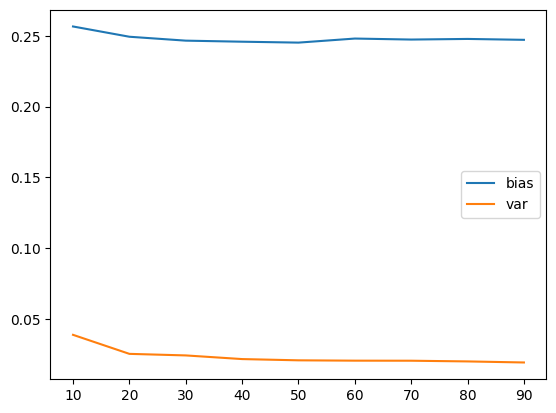

In [320]:
draw_bv(meta)

### шаги из 3

In [321]:
impot = []
tree = RandomForestRegressor(n_estimators=20, max_depth=6, min_samples_leaf=2)
ada = AdaBoostRegressor(tree,n_estimators=10,learning_rate=0.7, random_state=1)
ada.fit(X_train,y_train)
for num,feat in zip(ada.feature_importances_, X_train.columns):
    impot.append((num,feat))

impot = sorted(impot,reverse=True)
print(impot)
print(mean_squared_error(ada.predict(X_test), y_test), 'all features')

[(0.4908144205821659, 'OverallQual'), (0.10051226131051186, 'GrLivArea'), (0.0754423369033797, '2ndFlrSF'), (0.06185409323032942, 'GarageCars'), (0.028587364111939757, 'TotalBsmtSF'), (0.02425122794224719, 'BsmtFinSF1'), (0.024227600120001122, 'Neighborhood'), (0.022168998090438666, '1stFlrSF'), (0.018805188816012768, 'LotArea'), (0.013902468502572407, 'TotRmsAbvGrd'), (0.00993994088792926, 'YearRemodAdd'), (0.009512315051310411, 'LotFrontage'), (0.00949347642507296, 'YearBuilt'), (0.008712798430389655, 'Fireplaces'), (0.008593517701322785, 'GarageArea'), (0.008273594466663934, 'WoodDeckSF'), (0.007906689002905674, 'GarageYrBlt'), (0.00786999132088298, 'OpenPorchSF'), (0.007705905599623685, 'FullBath'), (0.007280507565149618, 'MoSold'), (0.005395511220287947, 'ScreenPorch'), (0.004581377050988861, 'MasVnrArea'), (0.0035080239173483556, 'KitchenQual'), (0.003281806879212525, 'BsmtUnfSF'), (0.0028446447372722328, 'OverallCond'), (0.0026038071864675975, 'ExterQual'), (0.002468830256803171

In [322]:
for o in range(6):
    cat = []
    for i in range(3+o):
        cat.append(impot[i][1])
    ada.fit(X_train[cat], y_train)
    print(cat)
    print(mean_squared_error(ada.predict(X_test[cat]),y_test), f'on {3+o} features')

['OverallQual', 'GrLivArea', '2ndFlrSF']
0.1562285954601434 on 3 features
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars']
0.14478610110460274 on 4 features
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF']
0.13767367738437752 on 5 features
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1']
0.12941477957920722 on 6 features
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'Neighborhood']
0.13014874266489335 on 7 features
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'Neighborhood', '1stFlrSF']
0.12724222468199398 on 8 features


Также хороший результат на меньшем наборе признаков

## task 6

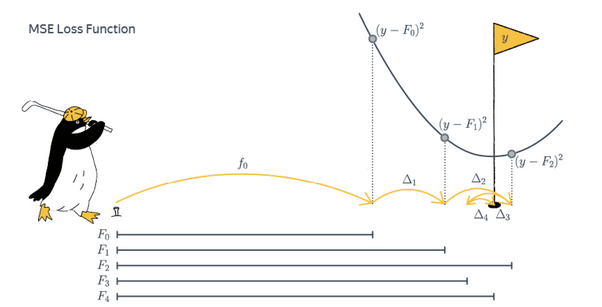

Основная идея заключается в том, что после обучения модели мы находим остатки через Loss функцию и затем обучаем след модель предсказывать ошибки прошлой.\
Формульно: мы строим комозицию из алгоритмов $a(x) = b_1(x) + b_2(x) + ... + b_n(x)$\
Если первый алгоритм обучается используя $\text{argmin}_b \, L(y_i,b(x_i))$ и теперь след алгоритм обучается на ошибках первого и улучшает предсказание.\
И если мы запишем обученеие i_ого алгоритма на ошибках и обобщим на дифф. функцию получим разложение в ряд тейлора:
\begin{equation}
L(y_i, a_k(x_i)) = L(y_i, a_{k-1}(x_i) + b(x_i)) = L(y_i, a_{k-1}(x_i)) + b(x_i)\frac{\delta L(y_i,a_{k-1}(x_i))}{\delta a_{k-1}(x_i)}
\end{equation},
где $a_{k-1}$ композиция на прошлом шаге, $b(x_i)$ ошибка композиции

Покажем на примере, который просто визуализировать

<Axes: xlabel='x', ylabel='y'>

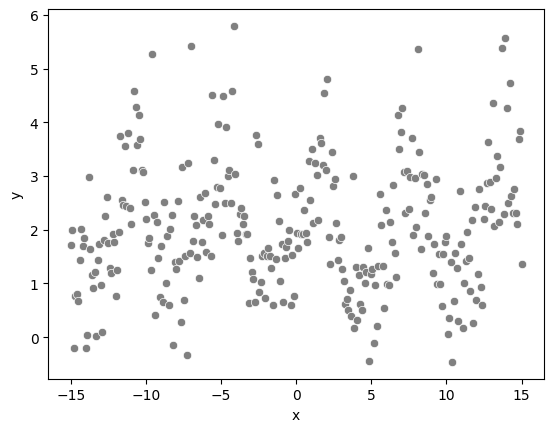

In [323]:
df = pd.DataFrame()
df["x"] = np.linspace(-15, 15, 300)
df["y"] = np.sin(df["x"]) + np.random.gamma(5,0.4,len(df['x']))
sns.scatterplot(x=df["x"], y=df["y"], color = "gray")

Обучим регрессор с 1ой итерацией

In [324]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1,max_depth=6, random_state=1)
x = pd.DataFrame(df['x'])
gbr.fit(x,df['y'])
pred = gbr.predict(x)

<Axes: xlabel='x', ylabel='y'>

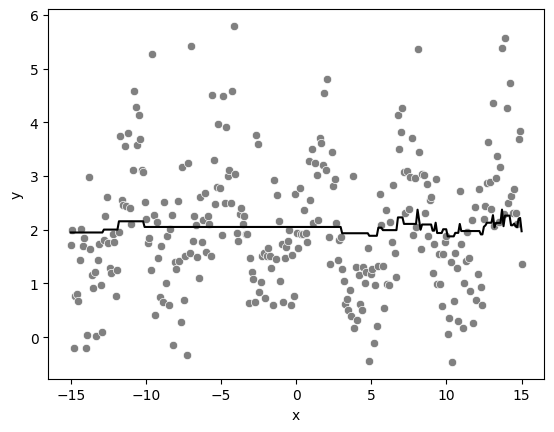

In [325]:
sns.scatterplot(x=df['x'], y=df["y"], color = "gray")
sns.lineplot(x=df['x'],y=pred, color = "black")

Теперь увеличим кол-во шагов обучения

In [326]:
gbr = GradientBoostingRegressor(n_estimators=2, max_depth=6, random_state=1)
x = pd.DataFrame(df['x'])
gbr.fit(x,df['y'])
pred = gbr.predict(x)

<Axes: xlabel='x', ylabel='y'>

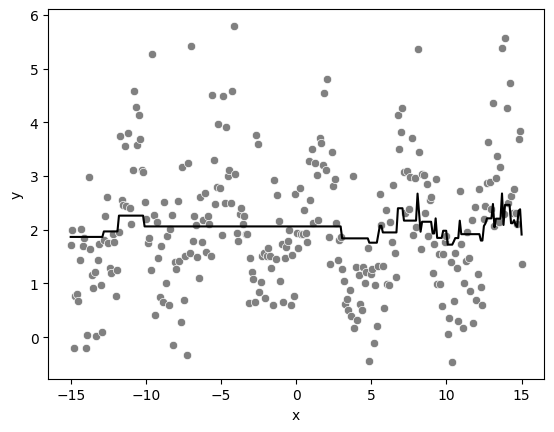

In [327]:
sns.scatterplot(x=df['x'], y=df["y"], color = "gray")
sns.lineplot(x=df['x'],y=pred, color = "black")

Видим что модель улучшает места где плохо отработала прошлая модель и так далее. Нужно быть осторожным т.к модель страдает от переобучения.

## task 7

In [328]:
from xgboost import XGBRegressor

### шаги из 2 (3ий пункт предполагает их?)

In [329]:
out_err = []
out_var = []

for i in range(20):
    model = XGBRegressor(n_estimators=1, learning_rate=0.1, max_depth = 6)
    model.fit(X_train,y_train)
    cv = cross_validate(model, X_train,y_train,cv=10, scoring="r2")
    out_err.append(np.mean(cv["test_score"]))
    out_var.append(np.var(cv["test_score"]))

0.1382441318996273  сред r2 набора по 1ому дереву
0.00022463610185302816  сред дисперсия


<Axes: >

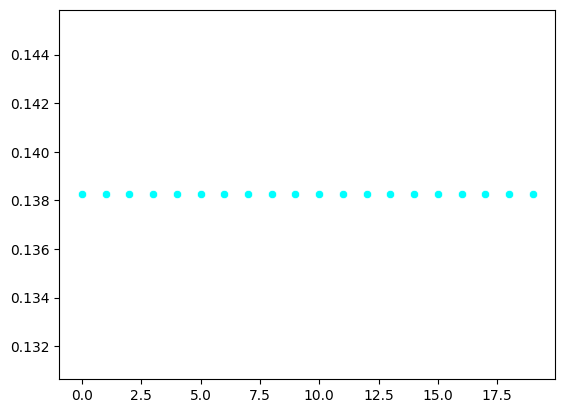

In [330]:
print(np.mean(out_err) , f" сред r2 набора по 1ому дереву")
print(np.mean(out_var), f" сред дисперсия")
sns.scatterplot(x=np.arange(0,len(out_err),1),y = out_err, color='cyan')

похоже XGboost в случае одного дерева строит самое оптимальное (нет сильной зависимости от random_state)

In [331]:
for depth in range(3,15):
    model = XGBRegressor(n_estimators=20, learning_rate=0.1, max_depth = depth , random_state = 99)
    r2, bias, var = decomposition_cv_r2(model, X_train, y_train, 5)
    print(f"depth {depth}")
    print(r2, "r2")
    print(var, "var")

depth 3
0.5593385976345019 r2
0.5018746 var
depth 4
0.5995487981620041 r2
0.52470195 var
depth 5
0.5966774094540728 r2
0.52539796 var
depth 6
0.6074741978905934 r2
0.5204366 var
depth 7
0.5742384643088096 r2
0.51578295 var
depth 8
0.5845834639759024 r2
0.5171491 var
depth 9
0.580967946949864 r2
0.52297556 var
depth 10
0.5759724816573952 r2
0.5173159 var
depth 11
0.5748269354167619 r2
0.517641 var
depth 12
0.5760702547846275 r2
0.5207516 var
depth 13
0.5756273020487924 r2
0.52070314 var
depth 14
0.5748149551606861 r2
0.52065 var


In [332]:
meta = []
for i in range(10,100,10):
    model = XGBRegressor(n_estimators=i, learning_rate = 0.1, max_depth=5)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    mse, bias, var = bias_variance_decomp(model, X_train_sub.values, y_train_sub, X_test_sub.values, y_test_sub, loss='mse', num_rounds=10, random_seed=11)
    meta.append((i, bias, var))

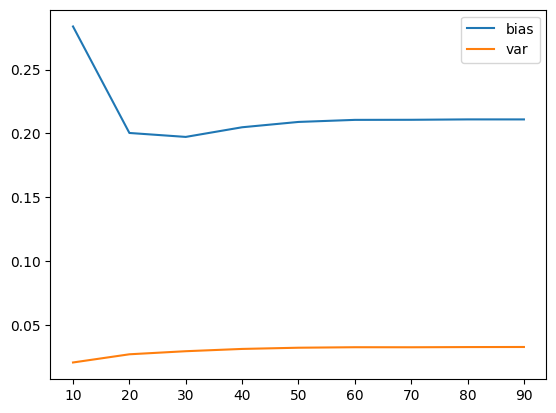

In [333]:
draw_bv(meta)

### шаги из 3

In [334]:
impot = []
model = XGBRegressor(n_estimators=20,learning_rate = 0.1, max_depth=5)
model.fit(X_train,y_train)
for num,feat in zip(model.feature_importances_, X_train.columns):
    impot.append((num,feat))

impot = sorted(impot, reverse=True)
print(impot)
print(mean_squared_error(model.predict(X_test), y_test), 'all features')

[(0.38961634, 'OverallQual'), (0.076495506, 'FullBath'), (0.06395513, 'GarageCars'), (0.033254895, 'Neighborhood'), (0.030556738, 'GrLivArea'), (0.02771137, '1stFlrSF'), (0.026607309, 'GarageFinish'), (0.026527522, '2ndFlrSF'), (0.020640079, 'GarageType'), (0.020330751, 'KitchenAbvGr'), (0.019727139, 'TotalBsmtSF'), (0.015747877, 'BsmtQual'), (0.015474187, 'KitchenQual'), (0.0146437185, 'GarageArea'), (0.013902131, 'Fireplaces'), (0.013759221, 'TotRmsAbvGrd'), (0.013704853, 'WoodDeckSF'), (0.010136683, 'HalfBath'), (0.010038334, 'YearRemodAdd'), (0.009218438, 'BsmtFinSF1'), (0.0091871135, 'YearBuilt'), (0.0089341495, 'LandContour'), (0.008379367, 'MSZoning'), (0.008219336, 'MasVnrArea'), (0.007880527, 'HeatingQC'), (0.0076543647, 'Exterior2nd'), (0.0071151354, 'HouseStyle'), (0.007016268, 'LotFrontage'), (0.00648708, 'ExterQual'), (0.0063888216, 'CentralAir'), (0.006148628, 'LandSlope'), (0.005972443, 'LotArea'), (0.0058454326, 'OverallCond'), (0.005764699, 'BsmtFullBath'), (0.00536405

In [335]:
for o in range(6):
    cat = []
    for i in range(3+o):
        cat.append(impot[i][1])
    model.fit(X_train[cat],y_train)
    print(cat)
    print(mean_squared_error(model.predict(X_test[cat]),y_test), f'on {3+o} features')

['OverallQual', 'FullBath', 'GarageCars']
0.2252713855790656 on 3 features
['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood']
0.21286966016106226 on 4 features
['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood', 'GrLivArea']
0.17356908080270922 on 5 features
['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood', 'GrLivArea', '1stFlrSF']
0.16559242948251973 on 6 features
['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood', 'GrLivArea', '1stFlrSF', 'GarageFinish']
0.16329243839398497 on 7 features
['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood', 'GrLivArea', '1stFlrSF', 'GarageFinish', '2ndFlrSF']
0.16594336981832772 on 8 features


Видим не такой значительный прирост как в примере 3. Видимо XGBoost хитро выбирает признаки.

no oob ;(